# **Anuncio Parroquial**

Se contempla hacer prácticas en laboratorios en ***Semana 12 y 13 (Nov. 6 y 13, respectivamente)***.

¿Qué se necesita?

1.   Nueva confirmación de asistencia.
2.   Depuración de lista para hacer reservas de laboratorios.
3.   **SIMEC aprobado**.
4.   **Verificación Consentimiento Informado**.
5.   **EPPS (botas punta de acero, overol, gafas de seguridad, tapabocas)**.

Por favor consultar el [Reglamento de Laboratorios de Ingeniería Mecánica](https://mecanica.uniandes.edu.co/sites/default/files/departamento/nuestros-laboratorios/reglamento%20ml%20027.pdf).

# **Semana 9: Python con Ejemplo Turbina Eficiente**
#### IMEC1000: Introducción a Ing. Mecánica
___

Vamos a hacer el mismo estudio de la Semana 5 (y Semana 7 pero *eficiente*), como:

\begin{equation}
\rho Q V u \: \leftarrow \: \frac{W d}{t} \hspace{25mm} \text{Ec. 1}
\end{equation}

Entonces:

1.   Definimos las variables estándar.
2.   Definimos el peso $\: W \:$ y la altura $\: d \:$ de prueba. Deben ser **fijos** y **conocidos**.
3.   Definimos los tiempos $\: t \:$ que queremos estudiar.

## **1. Librerías**

In [ ]:
#Importamos las Librerías
%matplotlib inline    
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **2. Definición de Parámetros de Entrada**

In [ ]:
#Alturas
cantidad_alturas_prueba = 5
d = np.linspace(0.2, 1, cantidad_alturas_prueba) #Unidades en metros

#Tiempo
t = 5 #Unidades en segundos

#Peso
cantidad_masas_prueba = 25
m = np.linspace(0.5, 25, cantidad_masas_prueba) #Masa en unidades en Kg
g = 9.81

## **3. Potencia Esperada *(Der. Ecuación 1)***

Primeras pruebas de desarrollo. Se dejan para ilustrar que Markdown permite redacción en formato de código, además de $\LaTeX$.

```python
#Potencia como Función, ¿Funcionará?
def potencia(masa, gravedad, altura, tiempo):
  calculo_potencia = (masa*gravedad)*altura/tiempo
  print(calculo_potencia)

#Nombre de Columnas Automático, ¿Funcionará?
nombre_columnas = []
for i in range(0, len(d)):
  i += 1
  nombre = 'Pot. Altura {}, W'.format(i)
  nombre_columnas.append(nombre)
nombre_columnas

potencias = pd.DataFrame(columns=nombre_columnas)  
```



___


Ahora sí, desde esta línea inicia el código desarrollado:


In [ ]:
datos = pd.DataFrame()

for i in range(0, len(d)):    #Apoyo 1
  datos_potencia = (m*g)*d[i]/t
  datos['Pot. Altura {}, W'.format(i+1)] = datos_potencia    #Apoyo 2

datos.head()

,"Pot. Altura 1, W","Pot. Altura 2, W","Pot. Altura 3, W","Pot. Altura 4, W","Pot. Altura 5, W"
0,0.196200,0.39240,0.588600,0.7848,0.981000
1,0.596775,1.19355,1.790325,2.3871,2.983875
2,0.997350,1.99470,2.992050,3.9894,4.986750
3,1.397925,2.79585,4.193775,5.5917,6.989625
4,1.798500,3.59700,5.395500,7.1940,8.992500


## **4. Velocidad Chorro de Agua**

Continuamos con:

1.   Hallar la velocidad del chorro de agua:
$$
P_{mecanica} = \rho A V^3
$$

In [ ]:
#Densidad agua 
rho = 997 #Unidades en Kg/m3

#Área transversal de chorro de agua
dia_chorro = 0.03
A = (np.pi/4)*(dia_chorro**2)

#Velocidades Chorro Agua
for i in range(0, len(d)):
  valores_potencia = datos[datos.columns[i]]    #Apoyo 3
  velocidad = (valores_potencia/(rho*A))**(1/3)
  datos['Vel. para Pot. {}'.format(i+1)] = velocidad

datos.head()

,"Pot. Altura 1, W","Pot. Altura 2, W","Pot. Altura 3, W","Pot. Altura 4, W","Pot. Altura 5, W",Vel. para Pot. 1,Vel. para Pot. 2,Vel. para Pot. 3,Vel. para Pot. 4,Vel. para Pot. 5
0,0.196200,0.39240,0.588600,0.7848,0.981000,0.652966,0.822685,0.941740,1.036519,1.116556
1,0.596775,1.19355,1.790325,2.3871,2.983875,0.946080,1.191986,1.364483,1.501808,1.617773
2,0.997350,1.99470,2.992050,3.9894,4.986750,1.122725,1.414545,1.619249,1.782215,1.919833
3,1.397925,2.79585,4.193775,5.5917,6.989625,1.256470,1.583053,1.812143,1.994522,2.148533
4,1.798500,3.59700,5.395500,7.1940,8.992500,1.366557,1.721753,1.970916,2.169273,2.336779


## **5. Caudal**

Finalizamos con:

1.   Hallar el respectivo caudal requerido:
$$
Q = VA
$$


In [ ]:
#Caudales
for i in range(0, len(d)):
  valores_velocidad = datos.loc[:,'Vel. para Pot. {}'.format(i+1)]    #Apoyo 4
  caudal = valores_velocidad*A
  datos['Caudal para Pot. {}'.format(i+1)] = caudal

datos.head()

,"Pot. Altura 1, W","Pot. Altura 2, W","Pot. Altura 3, W","Pot. Altura 4, W","Pot. Altura 5, W",Vel. para Pot. 1,Vel. para Pot. 2,Vel. para Pot. 3,Vel. para Pot. 4,Vel. para Pot. 5,Caudal para Pot. 1,Caudal para Pot. 2,Caudal para Pot. 3,Caudal para Pot. 4,Caudal para Pot. 5
0,0.196200,0.39240,0.588600,0.7848,0.981000,0.652966,0.822685,0.941740,1.036519,1.116556,0.000462,0.000582,0.000666,0.000733,0.000789
1,0.596775,1.19355,1.790325,2.3871,2.983875,0.946080,1.191986,1.364483,1.501808,1.617773,0.000669,0.000843,0.000964,0.001062,0.001144
2,0.997350,1.99470,2.992050,3.9894,4.986750,1.122725,1.414545,1.619249,1.782215,1.919833,0.000794,0.001000,0.001145,0.001260,0.001357
3,1.397925,2.79585,4.193775,5.5917,6.989625,1.256470,1.583053,1.812143,1.994522,2.148533,0.000888,0.001119,0.001281,0.001410,0.001519
4,1.798500,3.59700,5.395500,7.1940,8.992500,1.366557,1.721753,1.970916,2.169273,2.336779,0.000966,0.001217,0.001393,0.001533,0.001652


## **6. Gráficas**


#### 6.1. Juguemos con Esto - Ejm. 1
---

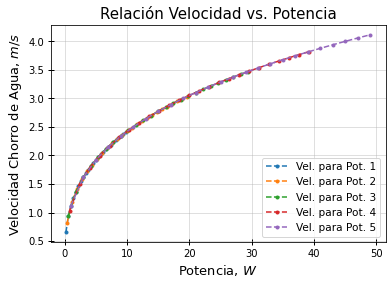

In [ ]:
for i in range(0, len(d)):
  x = datos.loc[:,'Pot. Altura {}, W'.format(i+1)]
  y = datos.loc[:,'Vel. para Pot. {}'.format(i+1)]

  plt.plot(x, y, marker='o', ls='--', markersize=3, label=y.name)

  plt.rc('font', family='DejaVu Sans')
  plt.rcParams['axes.axisbelow'] = True;

  plt.title('Relación Velocidad vs. Potencia', fontsize=15);
  plt.ylabel('Velocidad Chorro de Agua, $m/s$', fontsize=13);
  plt.xlabel('Potencia, $W$', fontsize=13);

  plt.tick_params(direction='inout', length=6, width=1, grid_alpha=0.5)

  plt.xticks(rotation=0)
  plt.grid(True);
  plt.legend(fontsize=10.5, loc='lower right');
  plt.tight_layout;

#### 6.2. Juguemos con Esto - Ejm. 2
---

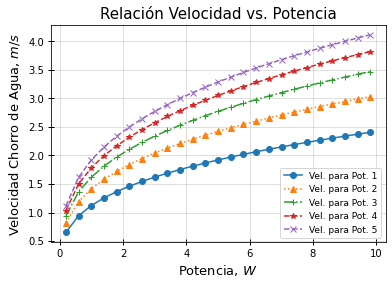

In [ ]:
for i in range(0, len(d)):
  x = datos.loc[:,'Pot. Altura 1, W']
  y = datos.loc[:,'Vel. para Pot. {}'.format(i+1)]

  markers = ['o', '^', '+', '*', 'x']
  lines = ['-', ':', '-.', 'dashed', '--']
  plt.plot(x, y, marker=markers[i], ls=lines[i], markersize=6, label=y.name)

  plt.rc('font', family='DejaVu Sans')
  plt.rcParams['axes.axisbelow'] = True;

  plt.title('Relación Velocidad vs. Potencia', fontsize=15);
  plt.ylabel('Velocidad Chorro de Agua, $m/s$', fontsize=13);
  plt.xlabel('Potencia, $W$', fontsize=13);

  plt.tick_params(direction='inout', length=6, width=1, grid_alpha=0.5)

  plt.xticks(rotation=0)
  plt.grid(True);
  plt.legend(fontsize=9, loc='lower right');
  plt.tight_layout;

#### 6.3. Juguemos con Esto - Ejm. 3
---

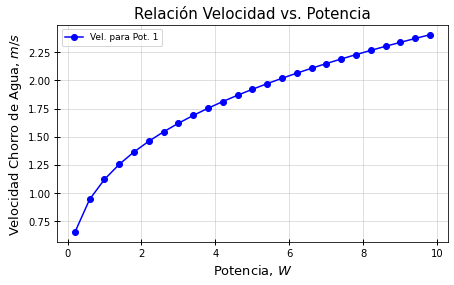

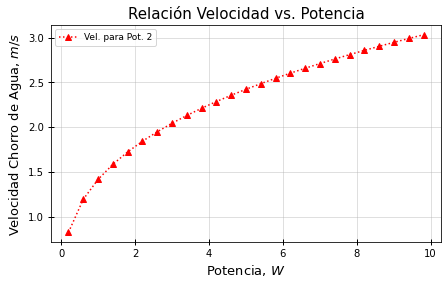

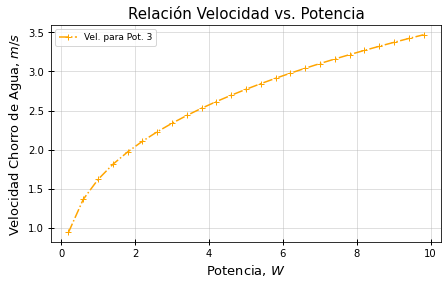

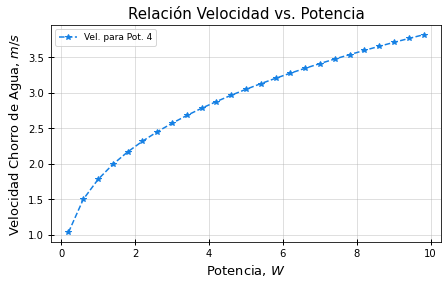

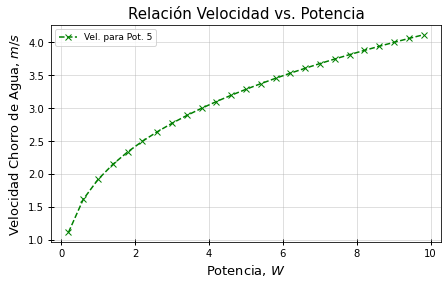

In [ ]:
for i in range(0, len(d)):
  x = datos.loc[:,'Pot. Altura 1, W']
  y = datos.loc[:,'Vel. para Pot. {}'.format(i+1)]

  plt.figure(figsize=(7, 4))
  markers = ['o', '^', '+', '*', 'x']
  lines = ['-', ':', '-.', 'dashed', '--']
  colors = ['b', 'red', 'orange', '#1580E4', 'green']
  plt.plot(x, y, marker=markers[i], ls=lines[i], markersize=6, color=colors[i], label=y.name)

  plt.rc('font', family='DejaVu Sans')
  plt.rcParams['axes.axisbelow'] = True;

  plt.title('Relación Velocidad vs. Potencia', fontsize=15);
  plt.ylabel('Velocidad Chorro de Agua, $m/s$', fontsize=13);
  plt.xlabel('Potencia, $W$', fontsize=13);

  plt.tick_params(direction='inout', length=6, width=1, grid_alpha=0.5)

  plt.xticks(rotation=0)
  plt.grid(True);
  plt.legend(fontsize=9, loc='best');
  plt.tight_layout;

#### 6.4. Juguemos con Esto - Ejm. 4
---

Seleccione el Eje X: a
Seleccione el Eje Y: b
Eje X puede ser (Pot. Altura #, W), (Vel. para Pot. #) o (Caudal para Pot. #): Pot. Altura 1, W
El Eje Y puede ser Potencia, Velocidad o Caudal: Velocidad


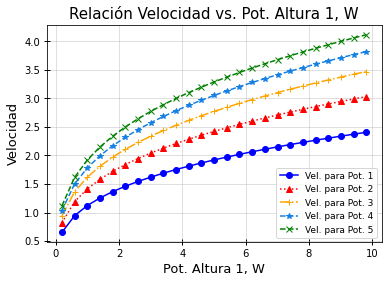

In [ ]:
X = input('Seleccione el Eje X: ')
Y = input('Seleccione el Eje Y: ')

while X not in datos.columns.values and Y not in ['Potencia', 'Velocidad', 'Caudal']:   #Apoyo 5
  X = input('Eje X puede ser (Pot. Altura #, W), (Vel. para Pot. #) o (Caudal para Pot. #): ')
  Y = input('El Eje Y puede ser Potencia, Velocidad o Caudal: ')

def graficas(X, Y):
  if Y == 'Velocidad':

    for i in range(0, len(d)):
      x = datos.loc[:, '{}'.format(X)]
      y = datos.loc[:,'Vel. para Pot. {}'.format(i+1)]

      markers = ['o', '^', '+', '*', 'x']
      lines = ['-', ':', '-.', 'dashed', '--']
      colors = ['b', 'red', 'orange', '#1580E4', 'green']
      plt.plot(x, y, marker=markers[i], ls=lines[i], markersize=6, color=colors[i], label=y.name)

      plt.rc('font', family='DejaVu Sans')
      plt.rcParams['axes.axisbelow'] = True;

      plt.title('Relación {} vs. {}'.format(Y,X), fontsize=15);   #Apoyo 6
      plt.ylabel('{}'.format(Y), fontsize=13);   #Apoyo 6
      plt.xlabel('{}'.format(X), fontsize=13);   #Apoyo 6

      plt.tick_params(direction='inout', length=6, width=1, grid_alpha=0.5)

      plt.xticks(rotation=0)
      plt.grid(True);
      plt.legend(fontsize=9, loc='lower right');
      plt.tight_layout;

  if Y == 'Caudal':

    for i in range(0, len(d)):
      x = datos.loc[:, '{}'.format(X)]
      y = datos.loc[:,'Caudal para Pot. {}'.format(i+1)]

      markers = ['o', '^', '+', '*', 'x']
      lines = ['-', ':', '-.', 'dashed', '--']
      colors = ['b', 'red', 'orange', '#1580E4', 'green']
      plt.plot(x, y, marker=markers[i], ls=lines[i], markersize=6, color=colors[i], label=y.name)

      plt.rc('font', family='DejaVu Sans')
      plt.rcParams['axes.axisbelow'] = True;

      plt.title('Relación {} vs. {}'.format(Y,X), fontsize=15);
      plt.ylabel('{}'.format(Y), fontsize=13);
      plt.xlabel('{}'.format(X), fontsize=13);

      plt.tick_params(direction='inout', length=6, width=1, grid_alpha=0.5)

      plt.xticks(rotation=0)
      plt.grid(True);
      plt.legend(fontsize=9, loc='lower right');
      plt.tight_layout;

graficas(X, Y)

# **¡Buen fin de semana!**